In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.rename(columns={"nameOrig": "customername"}, inplace=True)
df.rename(columns={"oldbalanceOrg": "inti_balence"}, inplace=True)
df.rename(columns={"newbalanceOrig": "new_balance_t"}, inplace=True)
df.rename(columns={"nameDest": "recipient_custmer"}, inplace=True)


In [4]:
df.shape

(6362620, 11)

(6362620, 11)

In [5]:
df.isnull().sum()

step                 0
type                 0
amount               0
customername         0
inti_balence         0
new_balance_t        0
recipient_custmer    0
oldbalanceDest       0
newbalanceDest       0
isFraud              0
isFlaggedFraud       0
dtype: int64

step                 0
type                 0
amount               0
customername         0
inti_balence         0
new_balance_t        0
recipient_custmer    0
oldbalanceDest       0
newbalanceDest       0
isFraud              0
isFlaggedFraud       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   step               int64  
 1   type               object 
 2   amount             float64
 3   customername       object 
 4   inti_balence       float64
 5   new_balance_t      float64
 6   recipient_custmer  object 
 7   oldbalanceDest     float64
 8   newbalanceDest     float64
 9   isFraud            int64  
 10  isFlaggedFraud     int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   step               int64  
 1   type               object 
 2   amount             float64
 3   customername       object 
 4   inti_balence       float64
 5   new_balance_t      float64
 6   recipient_custmer  object 
 7   o

In [7]:
df.describe()

,step,amount,inti_balence,new_balance_t,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


,step,amount,inti_balence,new_balance_t,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [9]:
from tabulate import tabulate
cat=[]
con=[]

for i in df.columns:
    if df[i].nunique()<50:
        cat.append(i)
        
    else:
        con.append(i)

print(tabulate({"Categorical":cat,
                "Continuous": con}, headers = ["categorical", "continuous"]))    

categorical     continuous
--------------  -----------------
type            step
isFraud         amount
isFlaggedFraud  customername
                inti_balence
                new_balance_t
                recipient_custmer
                oldbalanceDest
                newbalanceDest
categorical     continuous
--------------  -----------------
type            step
isFraud         amount
isFlaggedFraud  customername
                inti_balence
                new_balance_t
                recipient_custmer
                oldbalanceDest
                newbalanceDest


C:\Users\HOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


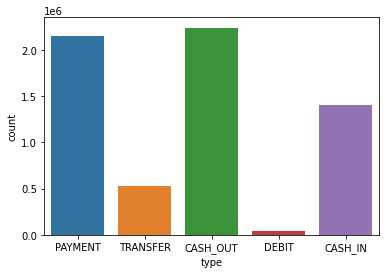

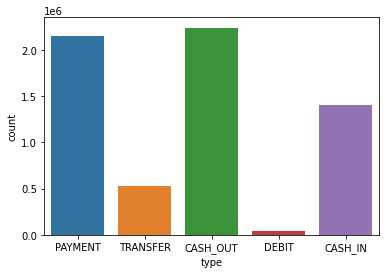

In [10]:
sns.countplot(df['type']);

In [11]:

for i in df.columns:
    print(i,':',df[i].nunique())

step : 743
step : 743
type : 5
type : 5
amount : 5316900
amount : 5316900
customername : 6353307
customername : 6353307
inti_balence : 1845844
inti_balence : 1845844
new_balance_t : 2682586
new_balance_t : 2682586
recipient_custmer : 2722362
recipient_custmer : 2722362
oldbalanceDest : 3614697
oldbalanceDest : 3614697
newbalanceDest : 3555499
isFraud : 2
newbalanceDest : 3555499
isFraud : 2
isFlaggedFraud : 2
isFlaggedFraud : 2


In [12]:
cat_col =[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat_col.append(x)
cat_col

['type', 'customername', 'recipient_custmer']

['type', 'customername', 'recipient_custmer']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   step               int64  
 1   type               object 
 2   amount             float64
 3   customername       object 
 4   inti_balence       float64
 5   new_balance_t      float64
 6   recipient_custmer  object 
 7   oldbalanceDest     float64
 8   newbalanceDest     float64
 9   isFraud            int64  
 10  isFlaggedFraud     int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   step               int64  
 1   type               object 
 2   amount             float64
 3   customername       object 
 4   inti_balence       float64
 5   new_balance_t      float64
 6   recipient_custmer  object 
 7   o

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label=LabelEncoder()

In [16]:
df['amount']=label.fit_transform(df['amount'])
df['inti_balence']=label.fit_transform(df['inti_balence'])
df['new_balance_t']=label.fit_transform(df['new_balance_t'])
df['recipient_custmer']=label.fit_transform(df['recipient_custmer'])
df['oldbalanceDest']=label.fit_transform(df['oldbalanceDest'])
df['newbalanceDest']=label.fit_transform(df['newbalanceDest'])
df['type']=label.fit_transform(df['type'])
df.head()

,step,type,amount,customername,inti_balence,new_balance_t,recipient_custmer,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,710400,C1231006815,587897,1157557,1662094,0,0,0,0
1,1,3,141767,C1666544295,140919,336044,1733924,0,0,0,0
2,1,4,13666,C1305486145,1672,0,439685,0,0,1,0
3,1,1,13666,C840083671,1672,0,391696,82843,0,1,0
4,1,3,822964,C2048537720,230032,456430,828919,0,0,0,0


,step,type,amount,customername,inti_balence,new_balance_t,recipient_custmer,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,710400,C1231006815,587897,1157557,1662094,0,0,0,0
1,1,3,141767,C1666544295,140919,336044,1733924,0,0,0,0
2,1,4,13666,C1305486145,1672,0,439685,0,0,1,0
3,1,1,13666,C840083671,1672,0,391696,82843,0,1,0
4,1,3,822964,C2048537720,230032,456430,828919,0,0,0,0


In [17]:
df=df.set_index('customername')
df.head()

,step,type,amount,inti_balence,new_balance_t,recipient_custmer,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
customername,,,,,,,,,,
C1231006815,1,3,710400,587897,1157557,1662094,0,0,0,0
C1666544295,1,3,141767,140919,336044,1733924,0,0,0,0
C1305486145,1,4,13666,1672,0,439685,0,0,1,0
C840083671,1,1,13666,1672,0,391696,82843,0,1,0
C2048537720,1,3,822964,230032,456430,828919,0,0,0,0


,step,type,amount,inti_balence,new_balance_t,recipient_custmer,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
customername,,,,,,,,,,
C1231006815,1,3,710400,587897,1157557,1662094,0,0,0,0
C1666544295,1,3,141767,140919,336044,1733924,0,0,0,0
C1305486145,1,4,13666,1672,0,439685,0,0,1,0
C840083671,1,1,13666,1672,0,391696,82843,0,1,0
C2048537720,1,3,822964,230032,456430,828919,0,0,0,0


In [18]:
df.shape

(6362620, 10)

(6362620, 10)

In [19]:
x=df.drop(columns="amount")
y=df["amount"]

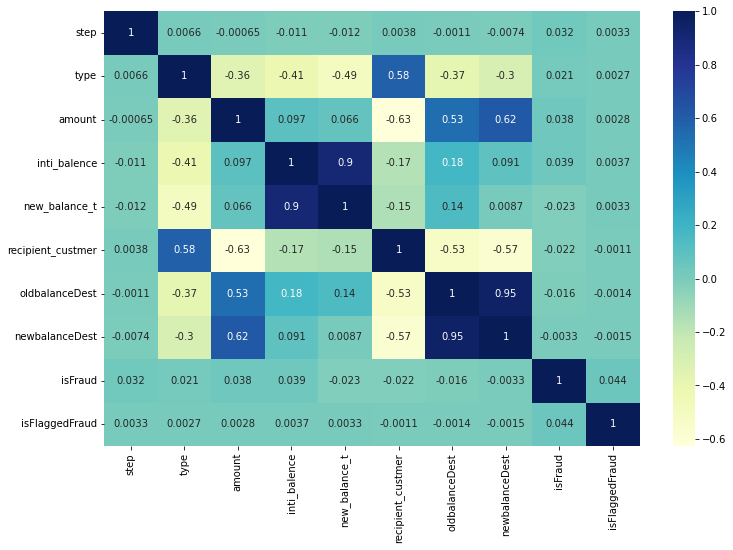

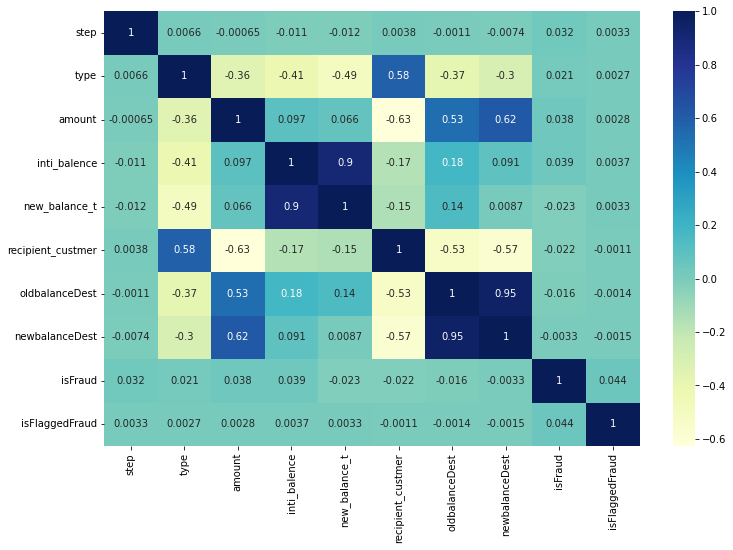

In [20]:
# Let's see the correlation between different variables.
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scale=StandardScaler()

In [23]:
df['type']=label.fit_transform(df['type'])

In [24]:
x1=x.copy()
x2=scale.fit_transform(x1)
x=pd.DataFrame(x2,columns=x1.columns)
x.head()

,step,type,inti_balence,new_balance_t,recipient_custmer,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,-1.703042,0.952399,0.514965,0.705988,1.220490,-0.866569,-0.933318,-0.035951,-0.001586
1,-1.703042,0.952399,-0.396568,-0.282878,1.316232,-0.866569,-0.933318,-0.035951,-0.001586
2,-1.703042,1.693076,-0.680537,-0.687379,-0.408856,-0.866569,-0.933318,27.815483,-0.001586
3,-1.703042,-0.528954,-0.680537,-0.687379,-0.472820,-0.797004,-0.933318,27.815483,-0.001586
4,-1.703042,0.952399,-0.214838,-0.137968,0.109953,-0.866569,-0.933318,-0.035951,-0.001586


,step,type,inti_balence,new_balance_t,recipient_custmer,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,-1.703042,0.952399,0.514965,0.705988,1.220490,-0.866569,-0.933318,-0.035951,-0.001586
1,-1.703042,0.952399,-0.396568,-0.282878,1.316232,-0.866569,-0.933318,-0.035951,-0.001586
2,-1.703042,1.693076,-0.680537,-0.687379,-0.408856,-0.866569,-0.933318,27.815483,-0.001586
3,-1.703042,-0.528954,-0.680537,-0.687379,-0.472820,-0.797004,-0.933318,27.815483,-0.001586
4,-1.703042,0.952399,-0.214838,-0.137968,0.109953,-0.866569,-0.933318,-0.035951,-0.001586


In [25]:
names=[]
result=[]

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [27]:
def error(x,y):
    print('ERRORS')
    print('MAE is :',mean_absolute_error(x,y))
    print('MSE is :',mean_squared_error(x,y))
    rmse=np.sqrt(mean_squared_error(x,y))
    print('RMSE is :',rmse)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [29]:
model_linear=LinearRegression()

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)
print(x_train.shape)
print(x_test.shape)

(4453834, 9)
(1908786, 9)
(4453834, 9)
(1908786, 9)


In [31]:
names.append(model_linear)
model_linear.fit(x_train,y_train)

LinearRegression()

LinearRegression()

In [32]:
model_linear.coef_

array([   13938.05885771,   -68276.83679583,  -277520.23945432,
         407372.87349665,  -537490.89260388, -1261783.33159831,
        1875700.92729855,    55322.01149776,     2322.11020374])

array([   13938.05885771,   -68276.83679583,  -277520.23945432,
         407372.87349665,  -537490.89260388, -1261783.33159831,
        1875700.92729855,    55322.01149776,     2322.11020374])

In [33]:
pd.DataFrame(model_linear.coef_.reshape(-1,1),columns=['slope'],index=x.columns).sort_values(by='slope',ascending=False)

,slope
newbalanceDest,1.875701e+06
new_balance_t,4.073729e+05
isFraud,5.532201e+04
step,1.393806e+04
isFlaggedFraud,2.322110e+03
type,-6.827684e+04
inti_balence,-2.775202e+05
recipient_custmer,-5.374909e+05
oldbalanceDest,-1.261783e+06


,slope
newbalanceDest,1.875701e+06
new_balance_t,4.073729e+05
isFraud,5.532201e+04
step,1.393806e+04
isFlaggedFraud,2.322110e+03
type,-6.827684e+04
inti_balence,-2.775202e+05
recipient_custmer,-5.374909e+05
oldbalanceDest,-1.261783e+06


In [34]:
y_pred=model_linear.predict(x_test)

In [35]:
error(y_test,y_pred)

ERRORS
MAE is : 855808.2372718512
MSE is : 1169989821820.486
RMSE is : 1081660.67776382
ERRORS
MAE is : 855808.2372718512
MSE is : 1169989821820.486
RMSE is : 1081660.67776382


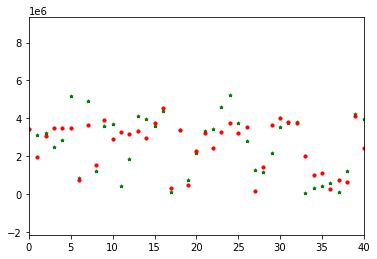

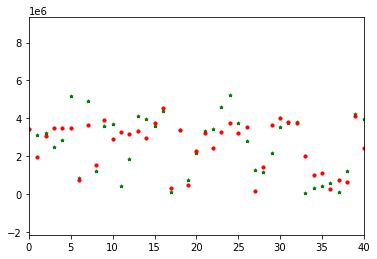

In [36]:
plt.scatter(range(len(y_test)),y_test,s=10,marker='*',c='green',label='Test Data')
plt.scatter(range(len(y_test)),y_pred,s=10,marker='o',c='red',label='Predicted Data')
plt.xlim(0,40)
plt.show()

In [37]:
y_train_pred = model_linear.predict(x_train)
res = (y_train - y_train_pred)

C:\Users\HOME\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HOME\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


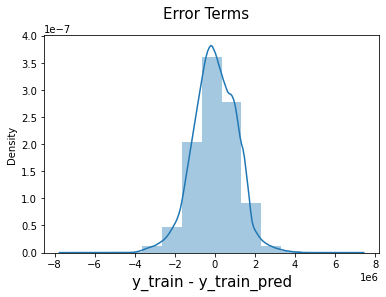

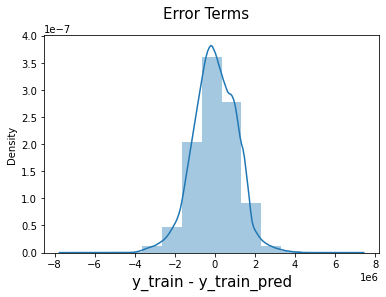

In [38]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()